In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from pandas_datareader import data
import yfinance as yf
yf.pdr_override()
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tickers = ['AAPL', 'MSFT', 'INTC', 'IBM', 'JPM',
          'BAC', 'GS', 'WFC', 'DIS', 'MCD', 'NKE',
          'SBUX', 'PG', 'WMT', 'PEP', 'JNJ', 
          'PFE', 'MRK', 'UNH', 'BA', 'CAT', 'MMM',
          'GE', 'XOM', 'CVX', 'SLB', 'BP', 'SO',
          'D', 'DUK', 'NEE', 'SPG', 'EQR']
weights = np.random.dirichlet(np.ones(len(tickers)))
weights

array([0.01851906, 0.01102261, 0.02048703, 0.00162626, 0.01238925,
       0.00238902, 0.00246928, 0.0403099 , 0.03533718, 0.03243424,
       0.00123167, 0.03437693, 0.04161526, 0.03019999, 0.01612445,
       0.0053224 , 0.00268823, 0.04238962, 0.03981531, 0.14113154,
       0.0214623 , 0.00347679, 0.00245668, 0.02887007, 0.00715136,
       0.00195003, 0.015439  , 0.09188647, 0.01741532, 0.03123463,
       0.09509881, 0.12369069, 0.02798861])

In [3]:
start_date = '2000-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')
end_date

'2023-08-30'

In [4]:
df = data.get_data_yahoo(tickers, start=start_date, end=end_date)['Adj Close']
df.head(3)

[*********************100%%**********************]  33 of 33 completed


,AAPL,BA,BAC,BP,CAT,CVX,D,DIS,DUK,EQR,...,PFE,PG,SBUX,SLB,SO,SPG,UNH,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,0.848323,25.940283,13.251131,19.408949,13.035656,17.508461,7.313036,23.115257,14.116089,6.639261,...,13.436362,28.608189,2.437765,17.723253,4.615688,7.143807,5.461557,10.209314,43.717705,18.668196
2000-01-04,0.776801,25.899944,12.464626,19.305813,12.868102,17.508461,7.492869,24.469282,14.335511,6.590082,...,12.935791,28.057693,2.360523,17.481297,4.666412,7.064869,5.391702,9.703737,42.081871,18.310623
2000-01-05,0.788168,27.513655,12.601400,19.965847,13.169698,17.822519,7.696674,25.484808,14.920638,6.727785,...,13.146561,27.523895,2.391421,17.440977,4.907339,7.124069,5.379002,9.605884,41.223045,19.308847


In [5]:
df.isna().sum()

AAPL    0
BA      0
BAC     0
BP      0
CAT     0
CVX     0
D       0
DIS     0
DUK     0
EQR     0
GE      0
GS      0
IBM     0
INTC    0
JNJ     0
JPM     0
MCD     0
MMM     0
MRK     0
MSFT    0
NEE     0
NKE     0
PEP     0
PFE     0
PG      0
SBUX    0
SLB     0
SO      0
SPG     0
UNH     0
WFC     0
WMT     0
XOM     0
dtype: int64

In [6]:
returns = df.pct_change()
returns.head(2)

,AAPL,BA,BAC,BP,CAT,CVX,D,DIS,DUK,EQR,...,PFE,PG,SBUX,SLB,SO,SPG,UNH,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,-0.08431,-0.001555,-0.059354,-0.005314,-0.012854,0.0,0.024591,0.058577,0.015544,-0.007407,...,-0.037255,-0.019243,-0.031686,-0.013652,0.010989,-0.01105,-0.01279,-0.049521,-0.037418,-0.019154


In [7]:
# Yearly returns for each company
annual_returns = df.resample('Y').last().pct_change()
annual_returns.head(2)

,AAPL,BA,BAC,BP,CAT,CVX,D,DIS,DUK,EQR,...,PFE,PG,SBUX,SLB,SO,SPG,UNH,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2000-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-12-31,0.472267,-0.404288,0.426989,-0.000712,0.136481,0.0928,-0.065783,-0.276376,-0.053597,0.102488,...,-0.124746,0.031077,-0.138983,-0.303317,0.318007,0.318391,0.153692,-0.202415,0.089483,-0.075971


In [8]:
annual_returns_mean = annual_returns.mean()
annual_returns_mean

AAPL    0.461796
BA      0.123707
BAC     0.103199
BP      0.060137
CAT     0.176993
CVX     0.121847
D       0.069112
DIS     0.092800
DUK     0.073873
EQR     0.114381
GE      0.040120
GS      0.128347
IBM     0.073797
INTC    0.086284
JNJ     0.083853
JPM     0.110691
MCD     0.145677
MMM     0.073554
MRK     0.076104
MSFT    0.185601
NEE     0.140961
NKE     0.161384
PEP     0.091329
PFE     0.046526
PG      0.095296
SBUX    0.213061
SLB     0.100900
SO      0.111167
SPG     0.161785
UNH     0.203087
WFC     0.068799
WMT     0.078849
XOM     0.102371
dtype: float64

In [9]:
annual_std_ind = returns.apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
annual_std_ind

AAPL    0.407230
BA      0.352578
BAC     0.443598
BP      0.302817
CAT     0.321662
CVX     0.278190
D       0.222771
DIS     0.306955
DUK     0.241938
EQR     0.327021
GE      0.332787
GS      0.361256
IBM     0.259457
INTC    0.375506
JNJ     0.192897
JPM     0.377133
MCD     0.230684
MMM     0.239455
MRK     0.266060
MSFT    0.305621
NEE     0.234031
NKE     0.305151
PEP     0.199681
PFE     0.251072
PG      0.214095
SBUX    0.332179
SLB     0.389102
SO      0.205163
SPG     0.371601
UNH     0.309479
WFC     0.378859
WMT     0.234814
XOM     0.265029
dtype: float64

In [10]:
returns.head(2)

,AAPL,BA,BAC,BP,CAT,CVX,D,DIS,DUK,EQR,...,PFE,PG,SBUX,SLB,SO,SPG,UNH,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,-0.08431,-0.001555,-0.059354,-0.005314,-0.012854,0.0,0.024591,0.058577,0.015544,-0.007407,...,-0.037255,-0.019243,-0.031686,-0.013652,0.010989,-0.01105,-0.01279,-0.049521,-0.037418,-0.019154


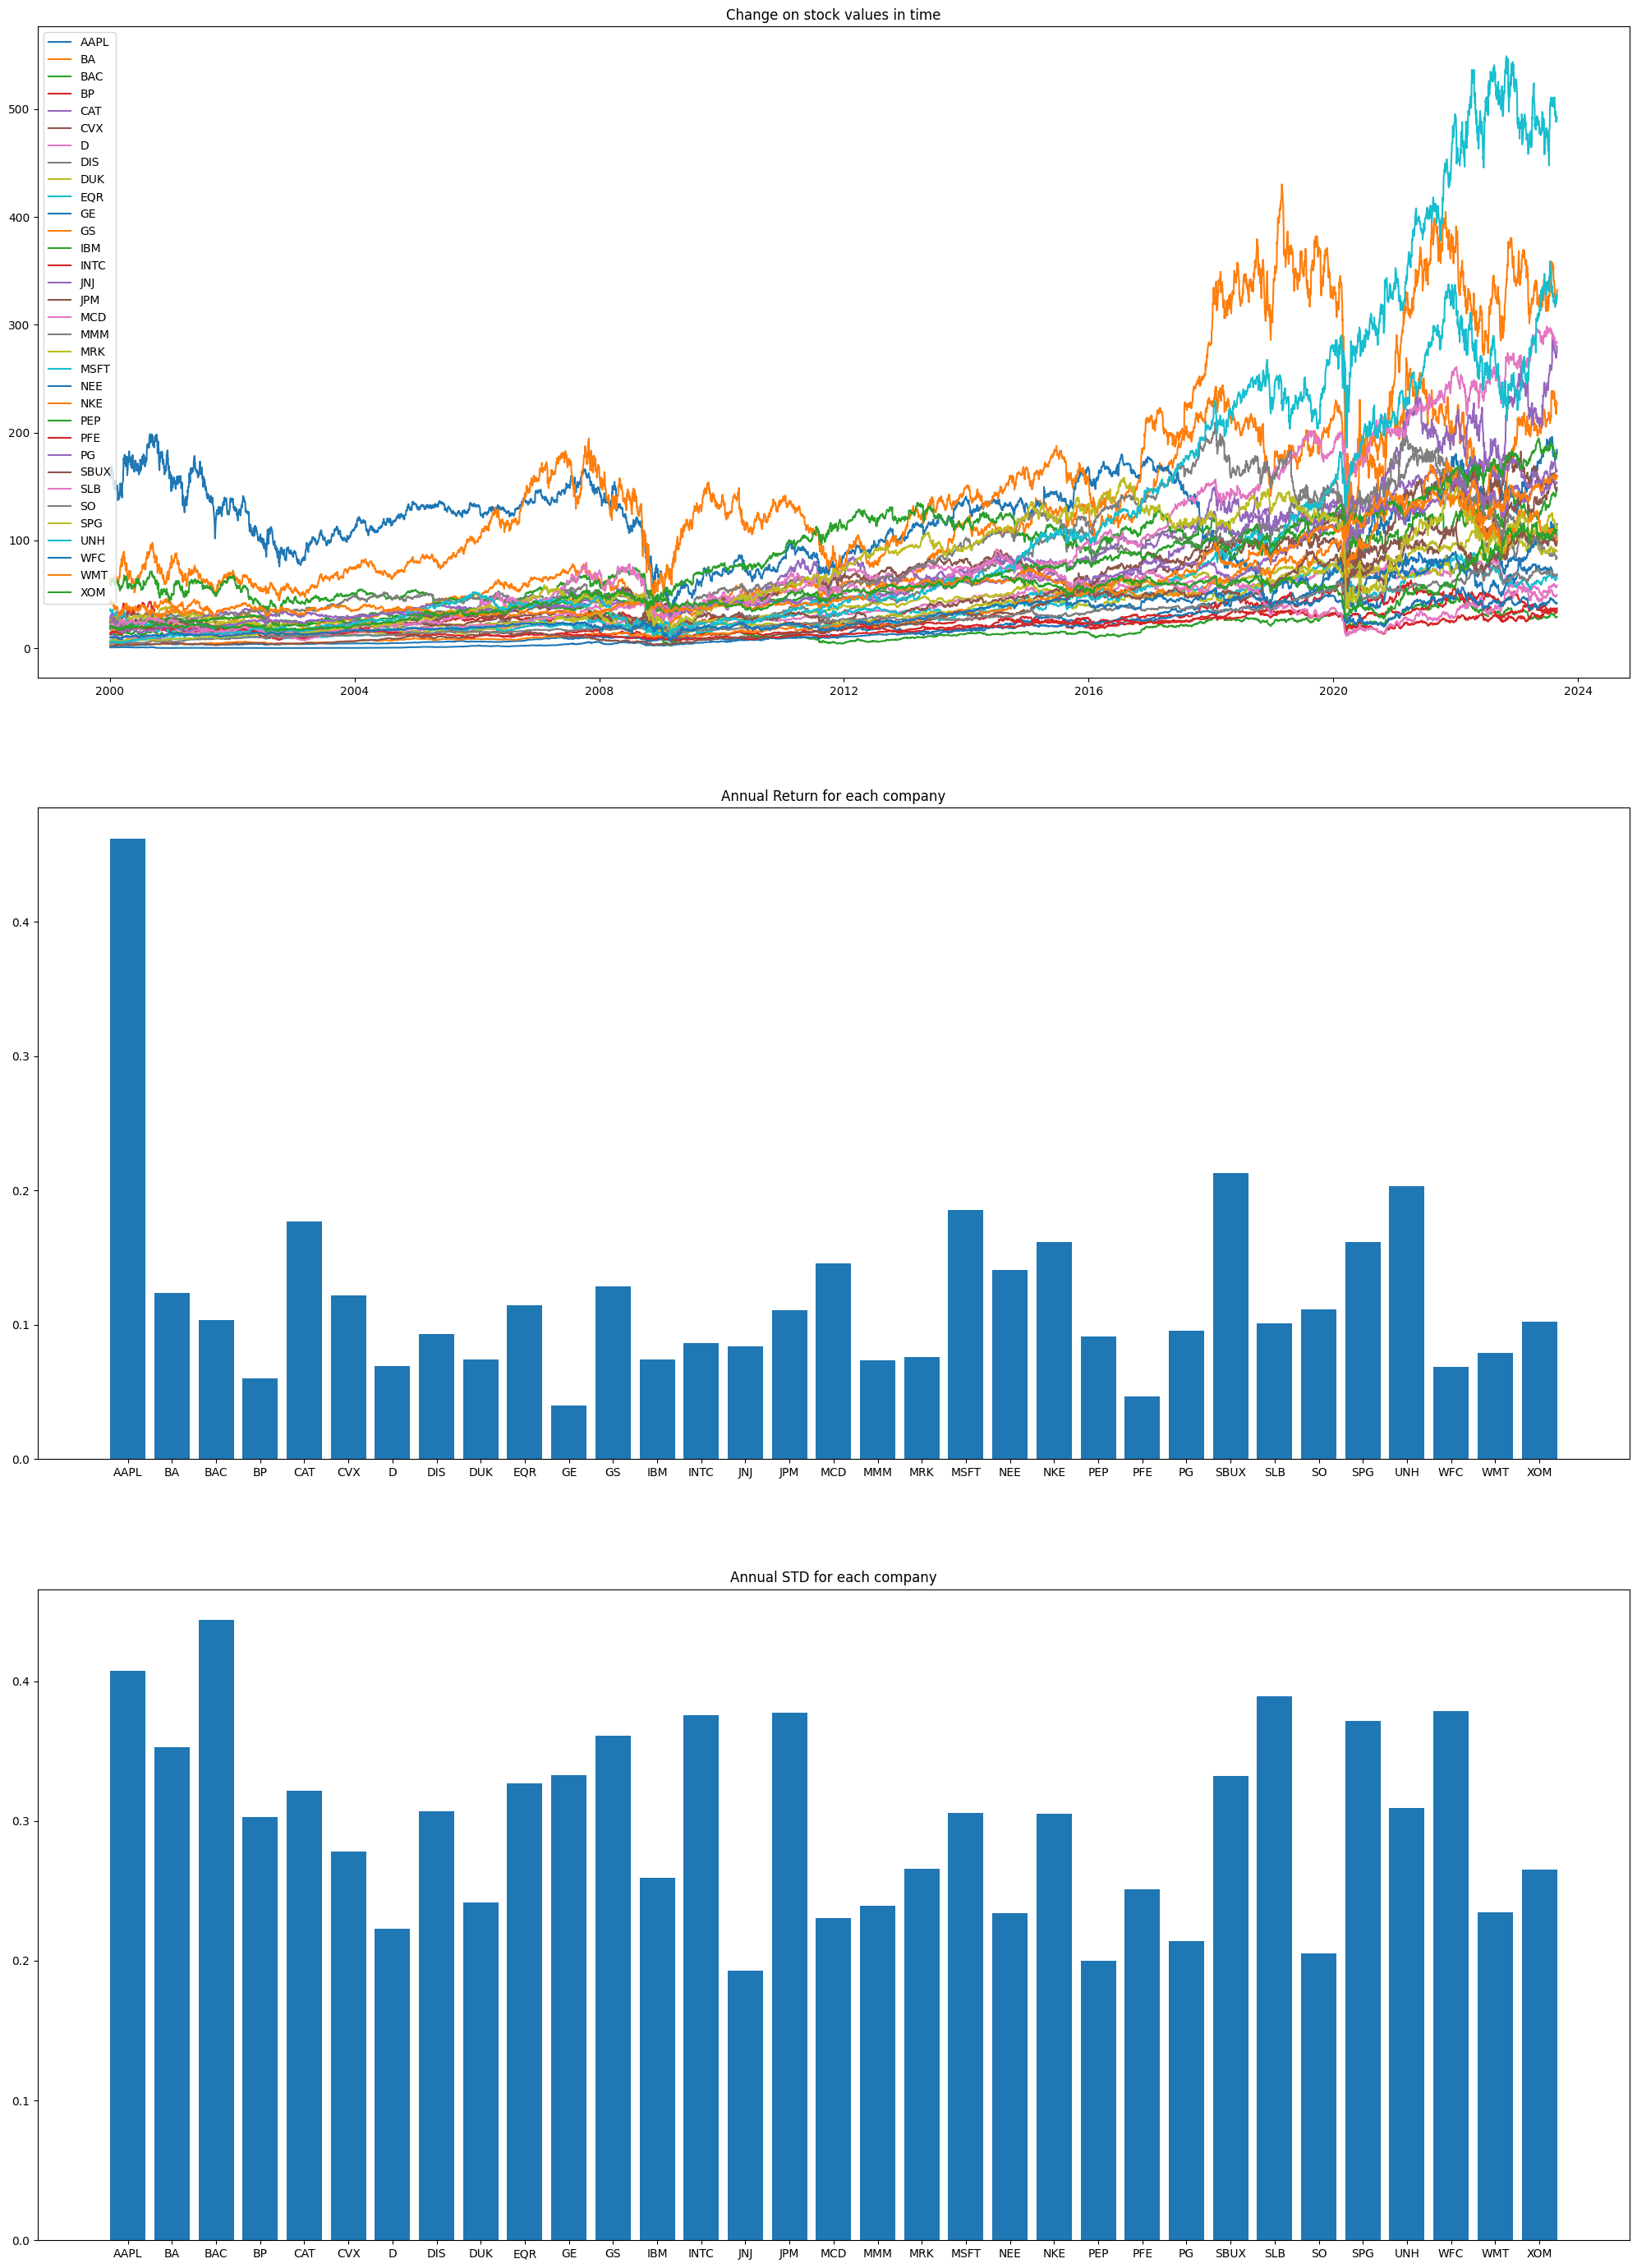

In [11]:
fig, ax = plt.subplots(3,1, figsize=(25,35))

for column in df.columns:
    ax[0].plot(df.index, df[column], label=column)
ax[0].set_title('Change on stock values in time')
ax[0].legend()

ax[1].bar(annual_returns_mean.keys(), annual_returns_mean)
ax[1].set_title('Annual Return for each company')

ax[2].bar(annual_std_ind.keys(), annual_std_ind)
ax[2].set_title('Annual STD for each company')

plt.show()

In [12]:
cov_matrix = returns.cov()
cov_matrix

,AAPL,BA,BAC,BP,CAT,CVX,D,DIS,DUK,EQR,...,PFE,PG,SBUX,SLB,SO,SPG,UNH,WFC,WMT,XOM
AAPL,0.000619,0.000164,0.000220,0.000119,0.000181,0.000121,0.000072,0.000173,0.000070,0.000139,...,0.000089,0.000068,0.000190,0.000158,0.000059,0.000162,0.000126,0.000176,0.000097,0.000114
BA,0.000164,0.000495,0.000258,0.000187,0.000214,0.000182,0.000094,0.000201,0.000106,0.000171,...,0.000113,0.000084,0.000184,0.000222,0.000085,0.000244,0.000145,0.000235,0.000090,0.000173
BAC,0.000220,0.000258,0.000791,0.000216,0.000287,0.000218,0.000110,0.000244,0.000107,0.000312,...,0.000156,0.000109,0.000239,0.000289,0.000086,0.000369,0.000198,0.000552,0.000113,0.000196
BP,0.000119,0.000187,0.000216,0.000365,0.000193,0.000250,0.000094,0.000147,0.000093,0.000129,...,0.000100,0.000060,0.000127,0.000306,0.000073,0.000184,0.000121,0.000187,0.000060,0.000236
CAT,0.000181,0.000214,0.000287,0.000193,0.000414,0.000192,0.000094,0.000184,0.000092,0.000174,...,0.000116,0.000084,0.000169,0.000263,0.000073,0.000211,0.000138,0.000243,0.000097,0.000180
CVX,0.000121,0.000182,0.000218,0.000250,0.000192,0.000309,0.000105,0.000150,0.000101,0.000137,...,0.000107,0.000070,0.000128,0.000309,0.000086,0.000186,0.000138,0.000190,0.000068,0.000247
D,0.000072,0.000094,0.000110,0.000094,0.000094,0.000105,0.000197,0.000086,0.000148,0.000109,...,0.000077,0.000075,0.000087,0.000107,0.000133,0.000104,0.000091,0.000102,0.000064,0.000101
DIS,0.000173,0.000201,0.000244,0.000147,0.000184,0.000150,0.000086,0.000378,0.000089,0.000166,...,0.000105,0.000078,0.000179,0.000190,0.000072,0.000206,0.000125,0.000211,0.000095,0.000142
DUK,0.000070,0.000106,0.000107,0.000093,0.000092,0.000101,0.000148,0.000089,0.000234,0.000112,...,0.000082,0.000079,0.000090,0.000100,0.000142,0.000112,0.000091,0.000104,0.000069,0.000102
EQR,0.000139,0.000171,0.000312,0.000129,0.000174,0.000137,0.000109,0.000166,0.000112,0.000430,...,0.000114,0.000088,0.000178,0.000176,0.000100,0.000373,0.000125,0.000293,0.000087,0.000129


In [13]:
# annualized covariance matrix
cov_matrix_annual = cov_matrix * 252
cov_matrix_annual

,AAPL,BA,BAC,BP,CAT,CVX,D,DIS,DUK,EQR,...,PFE,PG,SBUX,SLB,SO,SPG,UNH,WFC,WMT,XOM
AAPL,0.155922,0.041345,0.055361,0.029977,0.045653,0.030406,0.018042,0.043522,0.017739,0.035017,...,0.022365,0.017247,0.047878,0.039827,0.014745,0.040898,0.031843,0.044338,0.024513,0.028728
BA,0.041345,0.124842,0.065067,0.047118,0.053984,0.045888,0.023709,0.050763,0.026595,0.043086,...,0.028502,0.021112,0.046321,0.055991,0.021346,0.061449,0.036571,0.059102,0.022705,0.043539
BAC,0.055361,0.065067,0.199263,0.054392,0.072414,0.054967,0.027669,0.061525,0.027042,0.078738,...,0.039340,0.027452,0.060253,0.072765,0.021677,0.093091,0.049875,0.139194,0.028541,0.049499
BP,0.029977,0.047118,0.054392,0.091925,0.048551,0.062972,0.023650,0.037101,0.023368,0.032509,...,0.025235,0.015134,0.031889,0.077128,0.018466,0.046252,0.030590,0.047192,0.015000,0.059403
CAT,0.045653,0.053984,0.072414,0.048551,0.104258,0.048361,0.023629,0.046289,0.023156,0.043932,...,0.029185,0.021222,0.042683,0.066195,0.018513,0.053126,0.034867,0.061209,0.024544,0.045483
CVX,0.030406,0.045888,0.054967,0.062972,0.048361,0.077774,0.026397,0.037808,0.025557,0.034614,...,0.026952,0.017707,0.032317,0.077963,0.021683,0.046787,0.034676,0.047803,0.017046,0.062370
D,0.018042,0.023709,0.027669,0.023650,0.023629,0.026397,0.049737,0.021776,0.037333,0.027403,...,0.019395,0.018966,0.021804,0.026914,0.033456,0.026276,0.022901,0.025779,0.016003,0.025488
DIS,0.043522,0.050763,0.061525,0.037101,0.046289,0.037808,0.021776,0.095166,0.022357,0.041804,...,0.026437,0.019598,0.045229,0.047996,0.018230,0.051927,0.031560,0.053186,0.023982,0.035801
DUK,0.017739,0.026595,0.027042,0.023368,0.023156,0.025557,0.037333,0.022357,0.058958,0.028208,...,0.020665,0.019818,0.022593,0.025295,0.035869,0.028349,0.022834,0.026128,0.017411,0.025594
EQR,0.035017,0.043086,0.078738,0.032509,0.043932,0.034614,0.027403,0.041804,0.028208,0.108480,...,0.028647,0.022076,0.044802,0.044412,0.025135,0.094004,0.031445,0.073925,0.022023,0.032468


In [14]:
corr_matrix = returns.corr()
corr_matrix

,AAPL,BA,BAC,BP,CAT,CVX,D,DIS,DUK,EQR,...,PFE,PG,SBUX,SLB,SO,SPG,UNH,WFC,WMT,XOM
AAPL,1.000000,0.296339,0.314080,0.250388,0.358067,0.276110,0.204873,0.357281,0.185011,0.269247,...,0.224777,0.206907,0.362500,0.259411,0.180736,0.277285,0.258377,0.291634,0.262992,0.273222
BA,0.296339,1.000000,0.412543,0.439835,0.473187,0.465697,0.300880,0.465725,0.309989,0.370243,...,0.320136,0.283042,0.391947,0.407572,0.292417,0.465599,0.331625,0.434450,0.272241,0.462761
BAC,0.314080,0.412543,1.000000,0.401887,0.502405,0.441541,0.277932,0.446781,0.249494,0.535543,...,0.349750,0.291322,0.403546,0.419246,0.235044,0.558302,0.357984,0.809883,0.270875,0.416427
BP,0.250388,0.439835,0.401887,1.000000,0.495935,0.744760,0.349761,0.396665,0.317414,0.325546,...,0.330309,0.236449,0.314447,0.654274,0.294791,0.408402,0.323260,0.404270,0.209599,0.735775
CAT,0.358067,0.473187,0.502405,0.495935,1.000000,0.537062,0.328134,0.464710,0.295347,0.413101,...,0.358709,0.311351,0.395213,0.527268,0.277512,0.440484,0.345975,0.492357,0.322027,0.529001
CVX,0.276110,0.465697,0.441541,0.744760,0.537062,1.000000,0.424431,0.439464,0.377420,0.376843,...,0.383541,0.300770,0.346445,0.719009,0.376325,0.449147,0.398382,0.445200,0.258955,0.839871
D,0.204873,0.300880,0.277932,0.349761,0.328134,0.424431,1.000000,0.316525,0.689416,0.373063,...,0.345143,0.402845,0.292298,0.310391,0.726090,0.315427,0.329005,0.300221,0.304001,0.429199
DIS,0.357281,0.465725,0.446781,0.396665,0.464710,0.439464,0.316525,1.000000,0.298476,0.411438,...,0.340099,0.300933,0.438335,0.400153,0.286018,0.450641,0.327785,0.447791,0.329350,0.435819
DUK,0.185011,0.309989,0.249494,0.317414,0.295347,0.377420,0.689416,0.298476,1.000000,0.352722,...,0.337749,0.386631,0.278182,0.267931,0.714996,0.312569,0.301306,0.279486,0.303780,0.395850
EQR,0.269247,0.370243,0.535543,0.325546,0.413101,0.376843,0.373063,0.411438,0.352722,1.000000,...,0.345185,0.317513,0.406675,0.346803,0.369371,0.764097,0.305896,0.582952,0.283282,0.370204


In [15]:
# # Create subplots
# fig, axes = plt.subplots(1, 2, figsize=(25, 25))

# # Plot correlation matrix in the left subplot
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".5f", ax=axes[0])
# axes[0].set_title('Correlation Matrix')

# # Plot covariance matrix in the right subplot
# sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt=".5f", ax=axes[1])
# axes[1].set_title('Covariance Matrix')

# # Adjust layout to prevent overlap of titles and labels
# plt.tight_layout()

# # Show the plot
# plt.show()

In [16]:
port_variance = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()
port_variance

0.00014090483398515445

In [17]:
# portfolio volatility (std)
port_volatility = np.sqrt(port_variance)
port_volatility

0.011870334198545315

In [18]:
annual_port_volatility = port_volatility*np.sqrt(252)
annual_port_volatility

0.1884357136114567

In [19]:
# Portfolio expected return
expected_return = np.dot(annual_returns_mean, weights)
expected_return

0.11600191613848176

In [20]:
# Efficient frontier
assets = pd.concat([annual_returns_mean, annual_std_ind], axis=1)
assets.columns = ['Annual Mean Return', 'Annual Volatility']
assets

,Annual Mean Return,Annual Volatility
AAPL,0.461796,0.407230
BA,0.123707,0.352578
BAC,0.103199,0.443598
BP,0.060137,0.302817
CAT,0.176993,0.321662
CVX,0.121847,0.278190
D,0.069112,0.222771
DIS,0.092800,0.306955
DUK,0.073873,0.241938
EQR,0.114381,0.327021


In [21]:
p_returns = []
p_volatilities = []
p_weights = []

num_portfolios = 1000

In [22]:
for port in range(num_portfolios):
    weights = np.random.dirichlet(np.ones(len(tickers)))
    p_weights.append(weights)
    returns = np.dot(annual_returns_mean, weights)
    p_returns.append(returns)
    p_var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()
    p_vol = np.sqrt(p_var)
    annual_p_vol = p_vol * np.sqrt(252)
    p_volatilities.append(annual_p_vol)

In [23]:
data_new = {'Returns': p_returns,
         'Volatility': p_volatilities}
portfolios = pd.DataFrame(data_new)
portfolios

,Returns,Volatility
0,0.127307,0.199162
1,0.120204,0.196475
2,0.123033,0.189074
3,0.114530,0.200586
4,0.113156,0.186613
...,...,...
995,0.126574,0.237358
996,0.115252,0.196800
997,0.115342,0.188668
998,0.113781,0.189230


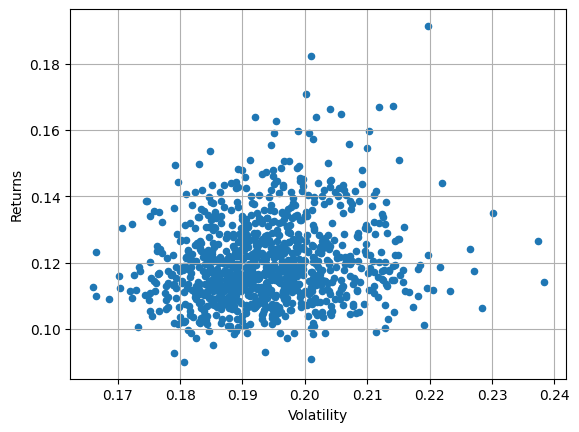

In [24]:
portfolios.plot.scatter(x='Volatility', y='Returns', grid=True)
plt.show()

In [25]:
portfolios[portfolios.Volatility==portfolios.Volatility.min()]

,Returns,Volatility
854,0.112814,0.165987


In [26]:
p_weights[854]

array([0.0099507 , 0.03211429, 0.00791278, 0.01274906, 0.01740081,
       0.10974426, 0.00981473, 0.00493724, 0.00822024, 0.02143335,
       0.01580198, 0.02191316, 0.04961782, 0.00226322, 0.01687986,
       0.00685462, 0.06903194, 0.00618485, 0.00656348, 0.01568995,
       0.01178956, 0.00506098, 0.13157856, 0.05331043, 0.00816338,
       0.0189399 , 0.0069892 , 0.1921614 , 0.00112177, 0.03239966,
       0.01208701, 0.04926979, 0.03205001])

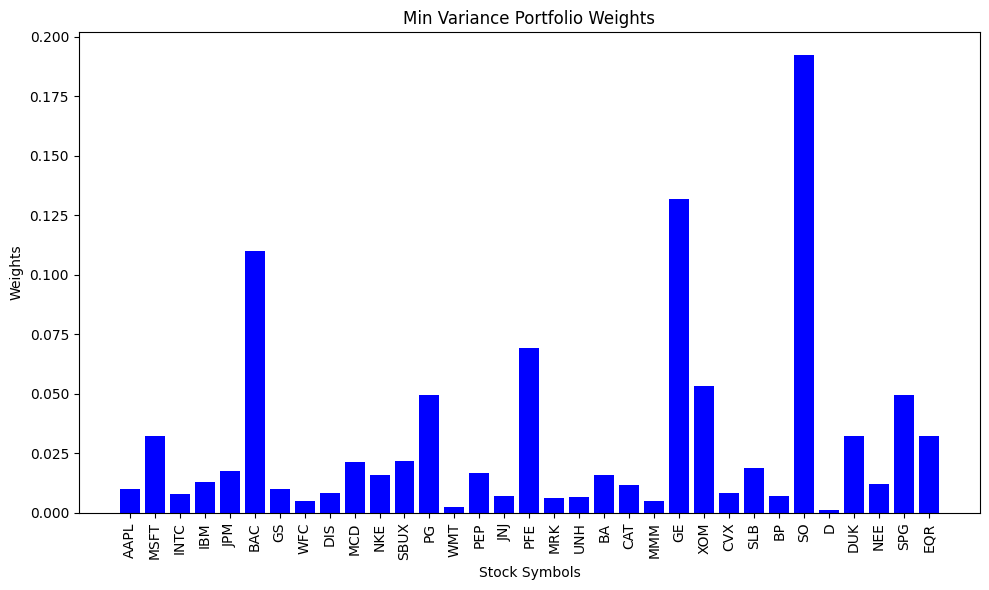

In [32]:
plt.figure(figsize=(10, 6))
plt.bar(tickers, p_weights[854], color='blue')
plt.xlabel('Stock Symbols')
plt.ylabel('Weights')
plt.title('Min Variance Portfolio Weights')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()

# Display the plot
plt.show()

In [62]:
# Optimal Risky Portfolio
rf = 0.025 # risk free rate
((portfolios.Returns - rf) / portfolios.Volatility).idxmax()

961

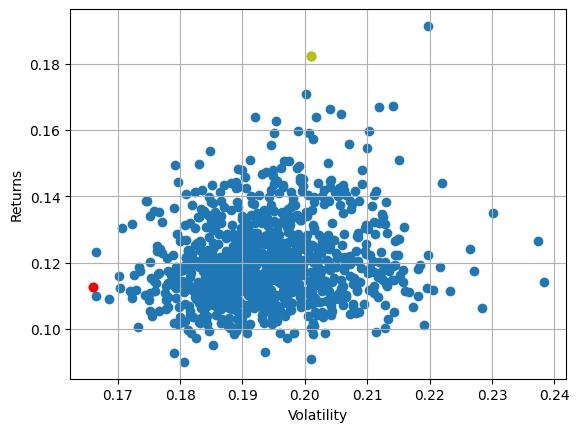

In [63]:
# Optimal Risky Portfolio and Min variance Portfolio
portfolios.plot.scatter(x='Volatility', y='Returns', grid=True)
plt.scatter(portfolios.Volatility, portfolios.Returns)
plt.scatter(portfolios.iloc[854].Volatility, portfolios.iloc[854].Returns, color='r')
plt.scatter(portfolios.iloc[961].Volatility, portfolios.iloc[961].Returns, color='y')
plt.show()

In [64]:
# Utility Function
cal_x = []
cal_y = []
utility = []
a = 5

In [69]:
for er in np.linspace(rf, max(p_returns), 20):
    sd = (er - rf)/((portfolios.iloc[961].Returns-rf)/portfolios.iloc[961].Volatility)
    u = er - .5*5*(sd**2)
    cal_x.append(sd)
    cal_y.append(er)
    utility.append(u)

In [72]:
data2 = {'utility':utility, 'cal_y':cal_y, 'cal_x':cal_x}
cal = pd.DataFrame(data2)
cal.head() # Capital allocation line

,utility,cal_y,cal_x
0,0.025000,0.025000,0.000000
1,0.033445,0.033757,0.011179
2,0.041265,0.042515,0.022358
3,0.048460,0.051272,0.033537
4,0.055031,0.060029,0.044716


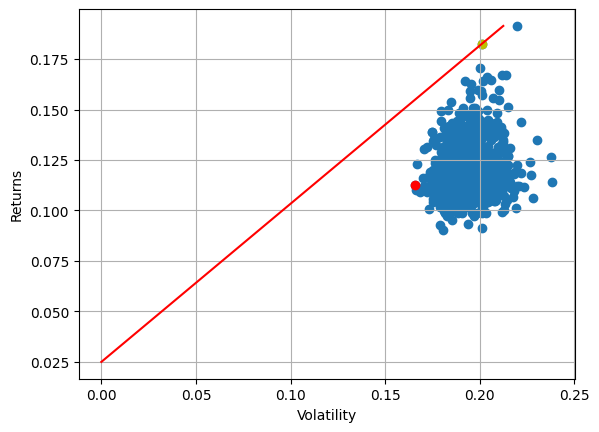

In [73]:
# Optimal Risky Portfolio and Min variance Portfolio
portfolios.plot.scatter(x='Volatility', y='Returns', grid=True)
plt.scatter(portfolios.Volatility, portfolios.Returns)
plt.scatter(portfolios.iloc[854].Volatility, portfolios.iloc[854].Returns, color='r')
plt.scatter(portfolios.iloc[961].Volatility, portfolios.iloc[961].Returns, color='y')
plt.plot(cal_x, cal_y, color='r')
plt.show()

In [74]:
# Investors optimal portfolio

cal['utility'].idxmax()

14

In [75]:
cal.iloc[14]

utility    0.086367
cal_y      0.147603
cal_x      0.156507
Name: 14, dtype: float64